In [1]:
import os, warnings
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve)
import joblib
warnings.filterwarnings('ignore')
OUTDIR = './outputs'
os.makedirs(OUTDIR, exist_ok=True)
os.makedirs(os.path.join(OUTDIR,'plots'), exist_ok=True)
print('Output dir:', OUTDIR)

Output dir: ./outputs


In [3]:

df = pd.read_excel("fake_dataset.xlsx")
df.to_csv("fake_dataset.csv", index=False)


print('Loaded', df.shape)
df.head()

Loaded (3000, 24)


,platform,has_profile_pic,bio_length,username_randomness,followers,following,follower_following_ratio,account_age_days,posts,posts_per_day,...,generic_comment_rate,suspicious_links_in_bio,verified,is_fake,username,username_length,digits_count,digit_ratio,special_char_count,repeat_char_count
0,X,1.0,180.0,1.0,431.0,679.0,0.633824,NaN,NaN,0.205945,...,5.0,1.0,0.0,0,dmitri,6,0,0.000000,0,0
1,NaN,1.0,214.0,NaN,426.0,729.0,0.583562,3164.0,202.0,0.063823,...,141.0,NaN,1.0,1,smpni6240,9,4,0.444444,0,0
2,X,1.0,87.0,NaN,426.0,721.0,0.590028,903.0,225.0,0.248894,...,62.0,1.0,0.0,1,qgph5q343j,10,4,0.400000,0,0
3,X,0.0,72.0,0.0,385.0,NaN,0.566176,3433.0,175.0,0.050961,...,117.0,1.0,1.0,0,mia,3,0,0.000000,0,0
4,Instagram,0.0,162.0,NaN,392.0,709.0,0.552113,NaN,207.0,0.162992,...,64.0,NaN,1.0,0,martin,6,0,0.000000,0,0


In [4]:
print('1) Shape:', df.shape)
print('2) Columns & dtypes:')
display(df.dtypes.to_frame('dtype').join(df.count().to_frame('non_null')))
print('\n3) Missing value percentage (top):')
miss_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
display(miss_pct[miss_pct>0].head(30))
print('\n4) Basic stats for numeric columns:')
display(df.describe().T)
print('\n5) First 5 rows:')
display(df.head())
with open(os.path.join(OUTDIR,'inspection.txt'),'w') as f:
    f.write('Shape: %s\n\n' % (str(df.shape)))
    f.write('Missing %:\n')
    f.write(miss_pct.to_string())
print('Saved inspection.txt')

1) Shape: (3000, 24)
2) Columns & dtypes:


,dtype,non_null
platform,object,2667
has_profile_pic,float64,2655
bio_length,float64,2671
username_randomness,float64,2663
followers,float64,2662
following,float64,2667
follower_following_ratio,float64,2644
account_age_days,float64,2657
posts,float64,2683
posts_per_day,float64,2689



3) Missing value percentage (top):


,0
generic_comment_rate,12.233333
suspicious_links_in_bio,12.000000
follower_following_ratio,11.866667
has_profile_pic,11.500000
account_age_days,11.433333
spam_comments_rate,11.266667
followers,11.266667
username_randomness,11.233333
verified,11.233333
platform,11.100000



4) Basic stats for numeric columns:


,count,mean,std,min,25%,50%,75%,max
has_profile_pic,2655.0,0.492655,0.500040,0.000000,0.000000,0.000000,1.000000,1.000000
bio_length,2671.0,124.181206,71.199830,0.000000,65.000000,124.000000,184.500000,249.000000
username_randomness,2663.0,0.503192,0.500084,0.000000,0.000000,1.000000,1.000000,1.000000
followers,2662.0,399.984222,20.082031,334.000000,387.000000,400.000000,413.000000,472.000000
following,2667.0,700.841395,25.841196,616.000000,684.000000,701.000000,718.000000,789.000000
follower_following_ratio,2644.0,0.570651,0.035102,0.467377,0.545967,0.570800,0.593853,0.693679
account_age_days,2657.0,2490.854347,1436.750871,2.000000,1247.000000,2455.000000,3746.000000,4997.000000
posts,2683.0,200.295937,14.233918,151.000000,190.000000,200.000000,209.000000,254.000000
posts_per_day,2689.0,0.273948,1.693301,0.034999,0.053500,0.080808,0.160743,73.333333
caption_similarity_score,2670.0,0.503490,0.286027,0.000146,0.259749,0.510672,0.748773,0.999496



5) First 5 rows:


,platform,has_profile_pic,bio_length,username_randomness,followers,following,follower_following_ratio,account_age_days,posts,posts_per_day,...,generic_comment_rate,suspicious_links_in_bio,verified,is_fake,username,username_length,digits_count,digit_ratio,special_char_count,repeat_char_count
0,X,1.0,180.0,1.0,431.0,679.0,0.633824,NaN,NaN,0.205945,...,5.0,1.0,0.0,0,dmitri,6,0,0.000000,0,0
1,NaN,1.0,214.0,NaN,426.0,729.0,0.583562,3164.0,202.0,0.063823,...,141.0,NaN,1.0,1,smpni6240,9,4,0.444444,0,0
2,X,1.0,87.0,NaN,426.0,721.0,0.590028,903.0,225.0,0.248894,...,62.0,1.0,0.0,1,qgph5q343j,10,4,0.400000,0,0
3,X,0.0,72.0,0.0,385.0,NaN,0.566176,3433.0,175.0,0.050961,...,117.0,1.0,1.0,0,mia,3,0,0.000000,0,0
4,Instagram,0.0,162.0,NaN,392.0,709.0,0.552113,NaN,207.0,0.162992,...,64.0,NaN,1.0,0,martin,6,0,0.000000,0,0


Saved inspection.txt


In [5]:
data = df.copy()

data.columns = [c.strip().replace(' ','_') for c in data.columns]

# date -> account_age_days
date_cols = [c for c in data.columns if any(x in c.lower() for x in ('date','created','joined'))]
for dc in date_cols:
    try:
        data[dc] = pd.to_datetime(data[dc], errors='coerce')
    except:
        pass
for dc in date_cols:
    if pd.api.types.is_datetime64_any_dtype(data[dc]):
        data['account_age_days'] = (pd.Timestamp.now() - data[dc]).dt.days
        break

if {'followers_count','friends_count'}.issubset(set(data.columns)):
    data['follower_following_ratio'] = data['followers_count'] / data['friends_count'].replace(0, np.nan)

id_cols = [c for c in data.columns if any(k in c.lower() for k in ('id','uuid','handle','account'))]
data.drop(columns=id_cols, inplace=True, errors='ignore')

high_missing = data.columns[data.isnull().mean() > 0.7].tolist()
print('Dropping >70% missing:', high_missing)
data.drop(columns=high_missing, inplace=True, errors='ignore')

display(data.head())

Dropping >70% missing: []


,platform,has_profile_pic,bio_length,username_randomness,followers,following,follower_following_ratio,posts,posts_per_day,caption_similarity_score,...,generic_comment_rate,suspicious_links_in_bio,verified,is_fake,username,username_length,digits_count,digit_ratio,special_char_count,repeat_char_count
0,X,1.0,180.0,1.0,431.0,679.0,0.633824,NaN,0.205945,0.699444,...,5.0,1.0,0.0,0,dmitri,6,0,0.000000,0,0
1,NaN,1.0,214.0,NaN,426.0,729.0,0.583562,202.0,0.063823,NaN,...,141.0,NaN,1.0,1,smpni6240,9,4,0.444444,0,0
2,X,1.0,87.0,NaN,426.0,721.0,0.590028,225.0,0.248894,0.858450,...,62.0,1.0,0.0,1,qgph5q343j,10,4,0.400000,0,0
3,X,0.0,72.0,0.0,385.0,NaN,0.566176,175.0,0.050961,0.176471,...,117.0,1.0,1.0,0,mia,3,0,0.000000,0,0
4,Instagram,0.0,162.0,NaN,392.0,709.0,0.552113,207.0,0.162992,0.265957,...,64.0,NaN,1.0,0,martin,6,0,0.000000,0,0


Detected target: is_fake


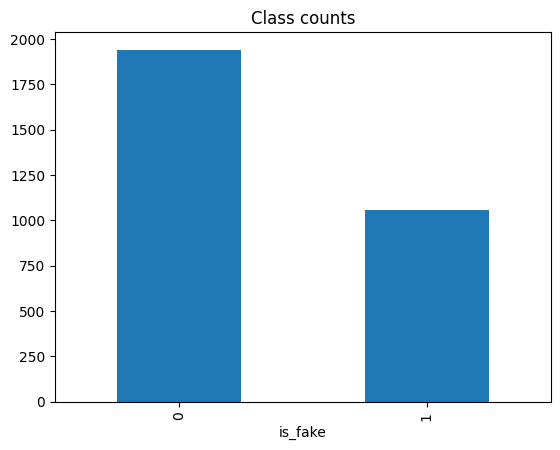

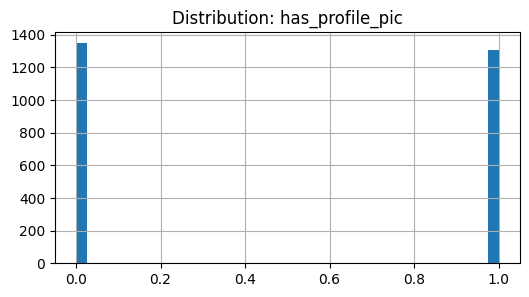

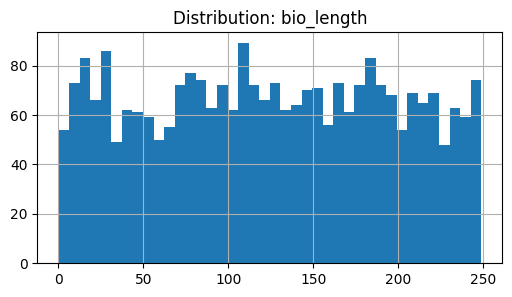

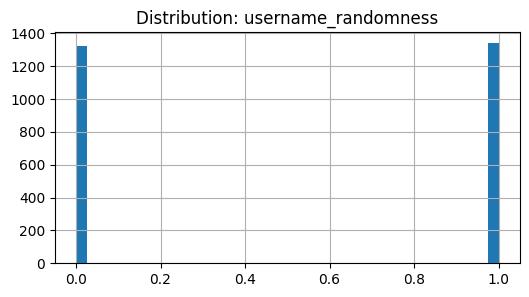

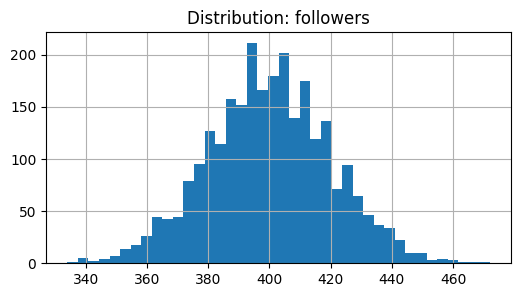

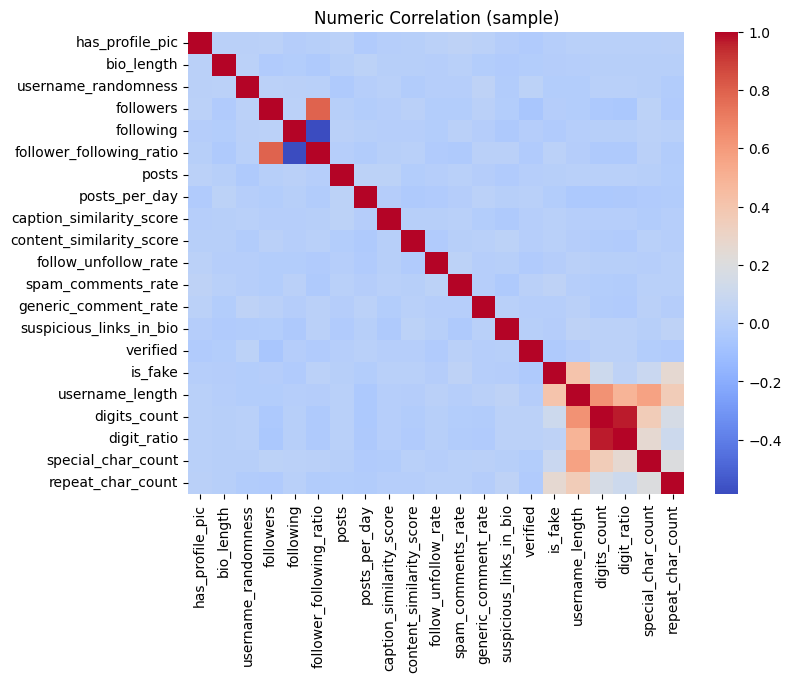

In [6]:
candidates = [c for c in data.columns if c.lower() in ('label','is_fake','fake','target','isbot','bot','class')]
target_col = candidates[0] if candidates else None
print('Detected target:', target_col)

if target_col:
    data[target_col].value_counts().plot(kind='bar', title='Class counts')
    plt.savefig(os.path.join(OUTDIR,'plots/class_counts.png'))
    plt.show()

num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols[:4]:
    plt.figure(figsize=(6,3))
    data[c].dropna().hist(bins=40)
    plt.title(f'Distribution: {c}')
    plt.savefig(os.path.join(OUTDIR,f'plots/dist_{c}.png'))
    plt.show()

if len(num_cols) >= 2:
    import seaborn as sns
    plt.figure(figsize=(8,6))
    sns.heatmap(data[num_cols].corr(), annot=False, cmap='coolwarm')
    plt.title('Numeric Correlation (sample)')
    plt.savefig(os.path.join(OUTDIR,'plots/corr_heatmap.png'))
    plt.show()

In [7]:
if target_col is None:
    raise ValueError('Please set target_col manually in the notebook.')
y = data[target_col].copy()
y = y.replace({'fake':1,'real':0,'bot':1,'genuine':0,'yes':1,'no':0, True:1, False:0})
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y.fillna('missing'))

X = data.drop(columns=[target_col], errors='ignore')
text_high = [c for c in X.select_dtypes(include=['object']).columns if X[c].nunique() > 50]
print('Dropping high-card text columns:', text_high)
X = X.drop(columns=text_high, errors='ignore')
print('Final X shape:', X.shape)

Dropping high-card text columns: ['username']
Final X shape: (3000, 21)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y if y.nunique()>1 else None)
print('Train:', X_train.shape, 'Test:', X_test.shape)

Train: (2400, 21) Test: (600, 21)


In [9]:
import os, joblib, warnings
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import sklearn

warnings.filterwarnings("ignore")
OUTDIR = "./outputs"
os.makedirs(OUTDIR, exist_ok=True)

TEST_SIZE = 0.20
RND = 42

for name in ("X", "y"):
    if name not in globals():
        raise RuntimeError(f"{name} not found — prepare X (DataFrame) and y (Series) before running this cell.")

high_card_text = [c for c in X.select_dtypes(include=["object"]).columns if X[c].nunique() > 50]
if high_card_text:
    X = X.drop(columns=high_card_text)
    print("Dropped high-card text columns:", high_card_text)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RND, stratify=(y if getattr(y, "nunique", lambda: 1)() > 1 else None)
)
print("Data shapes — Train:", X_train.shape, "Test:", X_test.shape, "| sklearn", sklearn.__version__)

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=["object","category","bool"]).columns.tolist()

major, minor = tuple(map(int, sklearn.__version__.split('.')[:2]))
ohe_kwargs = {"handle_unknown":"ignore"}
if (major, minor) >= (1,2):
    ohe_kwargs["sparse_output"] = False
else:
    ohe_kwargs["sparse"] = False

numeric_transformer = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
categorical_transformer = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")), ("ohe", OneHotEncoder(**ohe_kwargs))])

preprocessor = ColumnTransformer(
    [("num", numeric_transformer, numeric_features),
     ("cat", categorical_transformer, categorical_features)],
    remainder="drop"
)

models = {
    "LogisticRegression": LogisticRegression(solver="saga", max_iter=3000, C=0.7, penalty="l2", class_weight=None, n_jobs=-1, random_state=RND),
    "RandomForest": RandomForestClassifier(n_estimators=250, max_depth=8, min_samples_leaf=6, max_features="sqrt", random_state=RND, n_jobs=-1),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.04, max_depth=3, subsample=0.9, random_state=RND),
}

try:
    from xgboost import XGBClassifier
    models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric="logloss",
                                      n_estimators=250, max_depth=4, learning_rate=0.04,
                                      subsample=0.85, colsample_bytree=0.7,
                                      random_state=RND, n_jobs=-1, reg_alpha=1.0, reg_lambda=1.0)
    xgb_available = True
except Exception:
    xgb_available = False

preprocessor.fit(X_train)
Xtr = preprocessor.transform(X_train)
Xte = preprocessor.transform(X_test)

rows = []
trained_pipelines = {}
for name, clf in models.items():
    print(f"Training {name} ...", end=" ")
    try:
        clf.fit(Xtr, y_train)
        pipe = make_pipeline(preprocessor, clf)
        trained_pipelines[name] = pipe
        y_tr_pred = clf.predict(Xtr)
        y_te_pred = clf.predict(Xte)
        tr_acc = accuracy_score(y_train, y_tr_pred)
        te_acc = accuracy_score(y_test, y_te_pred)
        gap = tr_acc - te_acc
        rows.append((name, tr_acc, te_acc, gap))
        print("done.")
    except Exception as e:
        print("FAILED:", e)

df = pd.DataFrame(rows, columns=["Model","Train Acc","Test Acc","Gap"]).set_index("Model")
df = df.round(4)
print("\n===== SUMMARY =====")
display(df)

for name, pipe in trained_pipelines.items():
    path = os.path.join(OUTDIR, f"pipeline_{name}.joblib")
    try:
        joblib.dump(pipe, path)
    except Exception:
        joblib.dump(pipe.steps[-1][1], os.path.join(OUTDIR, f"estimator_{name}.joblib"))
print("Saved pipelines to", OUTDIR)

Data shapes — Train: (2400, 21) Test: (600, 21) | sklearn 1.6.1
Training LogisticRegression ... done.
Training RandomForest ... done.
Training GradientBoosting ... done.
Training XGBoost ... done.

===== SUMMARY =====


,Train Acc,Test Acc,Gap
Model,,,
LogisticRegression,0.7092,0.6983,0.0108
RandomForest,0.9029,0.9000,0.0029
GradientBoosting,0.9333,0.9267,0.0067
XGBoost,0.9604,0.9167,0.0438


Saved pipelines to ./outputs


In [10]:


if 'trained_pipelines' not in globals() or not trained_pipelines:
    raise RuntimeError("trained_pipelines not found. Run the train cell first and ensure trained_pipelines dict exists.")

summary_rows = []
per_model_samples = {}

print("\n")
print("  MODEL PERFORMANCE SUMMARY  ".center(60))
print("\n")

for name, pipe in trained_pipelines.items():
    try:
        estimator = pipe.steps[-1][1]
    except Exception:
        estimator = pipe

    try:
        preproc = pipe.steps[0][1]
        Xte_arr = preproc.transform(X_test)
        Xtr_arr = preproc.transform(X_train)
    except Exception:
        Xte_arr = X_test
        Xtr_arr = X_train

    try:
        y_pred_test = estimator.predict(Xte_arr)
        y_pred_train = estimator.predict(Xtr_arr)
    except Exception:
        y_pred_test = pipe.predict(X_test)
        y_pred_train = pipe.predict(X_train)

    y_prob_test = None
    if hasattr(estimator, "predict_proba"):
        try:
            y_prob_test = estimator.predict_proba(Xte_arr)[:, 1]
        except Exception:
            try:
                y_prob_test = pipe.predict_proba(X_test)[:, 1]
            except Exception:
                y_prob_test = None

    # metrics
    train_acc = float(accuracy_score(y_train, y_pred_train))
    test_acc  = float(accuracy_score(y_test, y_pred_test))
    precision = float(precision_score(y_test, y_pred_test, zero_division=0))
    recall    = float(recall_score(y_test, y_pred_test, zero_division=0))
    f1        = float(f1_score(y_test, y_pred_test, zero_division=0))
    gap       = train_acc - test_acc
    cm        = confusion_matrix(y_test, y_pred_test)

    summary_rows.append({
        "Model": name,
        "TrainAcc": train_acc,
        "TestAcc": test_acc,
        "Gap": gap,
        "Precision": precision,
        "Recall": recall,
        "F1": f1
    })

    sample_indices = list(X_test.index[:5])
    sample_list = []
    for idx in sample_indices:
        try:
            pos = list(X_test.index).index(idx)
            pred = int(y_pred_test[pos])
            prob = float(y_prob_test[pos]) if (y_prob_test is not None and len(y_prob_test) > pos) else None
        except Exception:
            pred = None
            prob = None
        sample_list.append({"orig_index": idx, "pred": pred, "prob": (round(prob,4) if prob is not None else None)})
    per_model_samples[name] = {"confusion_matrix": cm.tolist(), "samples": sample_list, "classification_report": classification_report(y_test, y_pred_test, zero_division=0)}

df_summary = pd.DataFrame(summary_rows).set_index("Model")
pd.options.display.float_format = "{:.4f}".format
print(">> Summary table (sorted by TestAcc):\n")
display(df_summary.sort_values("TestAcc", ascending=False))

df_summary.to_csv(os.path.join(OUTDIR, "models_summary_metrics.csv"))

print("\n" + "-"*60 + "\n")
for name, info in per_model_samples.items():
    row = df_summary.loc[name]
    print(f"🔹 {name} ".ljust(58, "─"))
    print(f"Train Acc : {row['TrainAcc']:.4f}    Test Acc : {row['TestAcc']:.4f}    Gap : {row['Gap']:.4f}")
    print(f"Precision : {row['Precision']:.4f}    Recall : {row['Recall']:.4f}    F1 : {row['F1']:.4f}")
    print("\nConfusion Matrix (rows: true, cols: pred):")
    cm = info["confusion_matrix"]
    cm_arr = np.array(cm)
    cm_df = pd.DataFrame(cm_arr, columns=[f"pred_{i}" for i in range(cm_arr.shape[1])], index=[f"true_{i}" for i in range(cm_arr.shape[0])])
    display(cm_df)
    print("Classification Report:\n")
    print(info["classification_report"])
    print("Sample predictions (first 5 test rows):")
    sample_df = pd.DataFrame(info["samples"])
    display(sample_df)
    sample_df.to_csv(os.path.join(OUTDIR, f"sample_preds_{name.replace(' ','_')}.csv"), index=False)
    print("\n" + "-"*60 + "\n")

print("All reports + CSVs saved to:", OUTDIR)
print("="*60 + "\n")



                 MODEL PERFORMANCE SUMMARY                  


>> Summary table (sorted by TestAcc):



,TrainAcc,TestAcc,Gap,Precision,Recall,F1
Model,,,,,,
GradientBoosting,0.9333,0.9267,0.0067,0.9038,0.8868,0.8952
XGBoost,0.9604,0.9167,0.0438,0.8971,0.8632,0.8798
RandomForest,0.9029,0.9000,0.0029,1.0000,0.7170,0.8352
LogisticRegression,0.7092,0.6983,0.0108,0.6183,0.3821,0.4723



------------------------------------------------------------

🔹 LogisticRegression ─────────────────────────────────────
Train Acc : 0.7092    Test Acc : 0.6983    Gap : 0.0108
Precision : 0.6183    Recall : 0.3821    F1 : 0.4723

Confusion Matrix (rows: true, cols: pred):


,pred_0,pred_1
true_0,338,50
true_1,131,81


Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       388
           1       0.62      0.38      0.47       212

    accuracy                           0.70       600
   macro avg       0.67      0.63      0.63       600
weighted avg       0.68      0.70      0.68       600

Sample predictions (first 5 test rows):


,orig_index,pred,prob
0,848,0,0.2921
1,2413,0,0.1745
2,1253,0,0.1314
3,2152,0,0.4290
4,300,0,0.1875



------------------------------------------------------------

🔹 RandomForest ───────────────────────────────────────────
Train Acc : 0.9029    Test Acc : 0.9000    Gap : 0.0029
Precision : 1.0000    Recall : 0.7170    F1 : 0.8352

Confusion Matrix (rows: true, cols: pred):


,pred_0,pred_1
true_0,388,0
true_1,60,152


Classification Report:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       388
           1       1.00      0.72      0.84       212

    accuracy                           0.90       600
   macro avg       0.93      0.86      0.88       600
weighted avg       0.91      0.90      0.90       600

Sample predictions (first 5 test rows):


,orig_index,pred,prob
0,848,0,0.2112
1,2413,0,0.0792
2,1253,0,0.1566
3,2152,1,0.8864
4,300,0,0.0689



------------------------------------------------------------

🔹 GradientBoosting ───────────────────────────────────────
Train Acc : 0.9333    Test Acc : 0.9267    Gap : 0.0067
Precision : 0.9038    Recall : 0.8868    F1 : 0.8952

Confusion Matrix (rows: true, cols: pred):


,pred_0,pred_1
true_0,368,20
true_1,24,188


Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       388
           1       0.90      0.89      0.90       212

    accuracy                           0.93       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.93      0.93      0.93       600

Sample predictions (first 5 test rows):


,orig_index,pred,prob
0,848,0,0.0328
1,2413,0,0.0181
2,1253,0,0.0532
3,2152,1,0.9727
4,300,0,0.0210



------------------------------------------------------------

🔹 XGBoost ────────────────────────────────────────────────
Train Acc : 0.9604    Test Acc : 0.9167    Gap : 0.0438
Precision : 0.8971    Recall : 0.8632    F1 : 0.8798

Confusion Matrix (rows: true, cols: pred):


,pred_0,pred_1
true_0,367,21
true_1,29,183


Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       388
           1       0.90      0.86      0.88       212

    accuracy                           0.92       600
   macro avg       0.91      0.90      0.91       600
weighted avg       0.92      0.92      0.92       600

Sample predictions (first 5 test rows):


,orig_index,pred,prob
0,848,0,0.0538
1,2413,0,0.0058
2,1253,0,0.0479
3,2152,1,0.9899
4,300,0,0.0122



------------------------------------------------------------

All reports + CSVs saved to: ./outputs



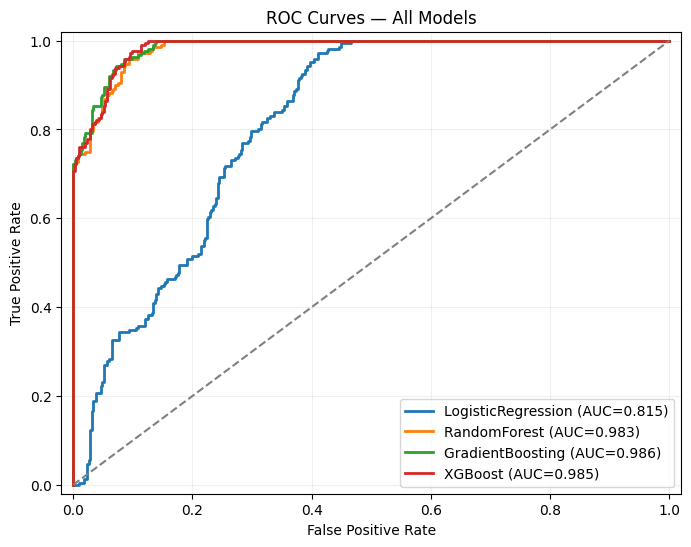


Saved ROC plot -> ./outputs/roc_curves.png
Saved AUC summary CSV -> ./outputs/models_auc_summary.csv


,AUC
Model,
GradientBoosting,0.9857
XGBoost,0.9850
RandomForest,0.9829
LogisticRegression,0.8146


In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

OUTDIR = "./outputs"
os.makedirs(OUTDIR, exist_ok=True)

source = globals().get("trained_pipelines", None) or globals().get("trained", None) or globals().get("results", None)
if not source:
    raise RuntimeError("No trained models found. Ensure `trained_pipelines` or `trained`/`results` exists from training step.")

roc_rows = []
plt.figure(figsize=(8,6))

for name, entry in source.items():
    model = None
    pipe = None
    if hasattr(entry, "predict"):
        try:
            if hasattr(entry, "named_steps"):
                pipe = entry
                model = entry.steps[-1][1]
            else:
                model = entry
        except Exception:
            model = entry
    elif isinstance(entry, dict):
        model = entry.get("model") or entry.get("estimator")
        if model is None and 'trained_pipelines' in globals():
            model = globals()['trained_pipelines'].get(name)
            if model is not None and hasattr(model, 'steps'):
                pipe = model
                model = model.steps[-1][1]
    else:
        model = entry

    if model is None:
        print(f"[WARN] Could not find estimator for {name}, skipping ROC.")
        continue

    X_te_for_model = None
    if pipe is not None:
        try:
            preproc = pipe.steps[0][1]
            X_te_for_model = preproc.transform(X_test)
        except Exception:
            X_te_for_model = X_test
    else:
        if 'preprocessor' in globals():
            try:
                X_te_for_model = globals()['preprocessor'].transform(X_test)
            except Exception:
                X_te_for_model = X_test
        else:
            X_te_for_model = X_test

    y_score = None
    try:
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_te_for_model)[:,1]
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(X_te_for_model)
        else:
            print(f"[WARN] model {name} has no predict_proba/decision_function — skipping ROC.")
            continue
    except Exception as e:
        print(f"[WARN] failed to get scores for {name}: {e} -- trying pipeline.predict_proba")
        try:
            if pipe is not None and hasattr(pipe, "predict_proba"):
                y_score = pipe.predict_proba(X_test)[:,1]
        except Exception:
            print(f"[WARN] fallback predict_proba failed for {name}; skipping.")
            continue

    try:
        fpr, tpr, _ = roc_curve(y_test, y_score)
        auc = roc_auc_score(y_test, y_score)
        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={auc:.3f})")
        roc_rows.append({"Model": name, "AUC": auc})
    except Exception as e:
        print(f"[WARN] ROC compute failed for {name}: {e}")

plt.plot([0,1],[0,1], linestyle='--', color='grey')
plt.xlim([-0.02,1.02])
plt.ylim([-0.02,1.02])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves — All Models")
plt.legend(loc="lower right")
plt.grid(alpha=0.2)

out_png = os.path.join(OUTDIR, "roc_curves.png")
plt.savefig(out_png, bbox_inches='tight', dpi=150)
plt.show()

if roc_rows:
    auc_df = pd.DataFrame(roc_rows).set_index("Model").sort_values("AUC", ascending=False)
    auc_df.to_csv(os.path.join(OUTDIR, "models_auc_summary.csv"))
    print("\nSaved ROC plot ->", out_png)
    print("Saved AUC summary CSV ->", os.path.join(OUTDIR, "models_auc_summary.csv"))
    display(auc_df)
else:
    print("No ROC curves were generated (no models with probability/decision scores).")

In [12]:

import os, joblib
import pandas as pd

OUTDIR = "./outputs"
os.makedirs(OUTDIR, exist_ok=True)

if "df_summary" not in globals():
    raise RuntimeError("df_summary not found. Run the summary cell first.")

if "trained_pipelines" not in globals() or not trained_pipelines:
    raise RuntimeError("trained_pipelines dict missing. Make sure models were trained.")


best_row = df_summary.sort_values("TestAcc", ascending=False).iloc[0]
best_model_name = best_row.name

print("\n")
print("OUR DOPE MODEL")
print(" ")
print(f"Model Name : {best_model_name}")
print(f"Train Acc  : {best_row['TrainAcc']:.4f}")
print(f"Test Acc   : {best_row['TestAcc']:.4f}")
print(f"Gap        : {best_row['Gap']:.4f}")
print("\n")

best_model_pipeline = trained_pipelines[best_model_name]


save_path = os.path.join(OUTDIR, f"best_model_{best_model_name}.joblib")

joblib.dump(best_model_pipeline, save_path)

print(f"Our DOPE model saved successfully at:\n   {save_path}")



OUR DOPE MODEL
 
Model Name : GradientBoosting
Train Acc  : 0.9333
Test Acc   : 0.9267
Gap        : 0.0067


Our DOPE model saved successfully at:
   ./outputs/best_model_GradientBoosting.joblib



 Models Trained: LogisticRegression, RandomForest, GradientBoosting.
 Best model --> `outputs/best_model.joblib`.
 Key metrics --> `outputs/metrics_summary.txt`.
 Plots --> `outputs/plots/`.

